# 机器学习在时间序列预测中的应用

机器学习（Machine Learning）是人工智能（AI）中很重要的一部分，在目前的实践过程中，大多数人工智能问题是由机器学习的方式实现的。目前机器学习已经广泛应用于数据挖掘、计算机视觉、自然语言处理、语音和手写识别、生物特征识别、医学诊断、检测信用卡欺诈、证券市场分析、搜索引擎、DNA序列测序、无人驾驶、机器人等领域。机器学习算法有很多，有分类、回归、聚类、推荐、图像识别领域等等，具体算法比如线性回归、逻辑回归、朴素贝叶斯、随机森林、支持向量机、神经网络等等。在机器学习算法中，没有最好的算法，只有“更适合”解决当前任务的算法。

如果按照学习方式分类可分为监督式学习、非监督式学习、半监督式学习和增强学习。其中有监督学习训练集目标:有标注; 如回归分析，统计分类；无监督学习训练集目标:无标注;如聚类、GAN(生成对抗网络)；半监督式学习介于监督式与无监督式之间；增强学习则是智能体不断与环境进行交互，通过试错的方式来获得最佳策略。如果按照学习任务分类可分为以下三类：分类、回归和聚类。其中分类是预测一个标签 （是离散的），属于监督学习；回归是预测一个数量 （是连续的），属于监督学习；聚类属于无监督学习。

分类方法是一种对离散型随机变量建模或预测的监督学习方法。其中分类学习的目的是从给定的人工标注的分类训练样本数据集中学习出一个分类函数或者分类模型，也常常称作分类器（classifier）。当新的数据到来时，可以根据这个函数进行预测，将新数据项映射到给定类别中的某一个类中。

对于分类，输入的训练数据包含信息有特征（Feature），也称为属性（Attribute），有标签（label）,也常称之为类别（class），具体可表示为（F1，F2，...Fn; label）。而所谓的学习，其本质就是找到特征与标签间的关系（mapping 即映射） 。所以说分类预测模型是求取一个从输入变量 (特征)  到离散的输出变量（标签） 之间的映射函数。这样当有特征而无标签的未知数据输入时，可以通过映射函数预测未知数据的标签。

简单地说，分类就是按照某种标准给对象贴标签，再根据标签来区分归类。

分类方法常用的有Logistic 回归、线性判别法、 二次判别分析、朴素贝叶斯、分类树、支持向量机 （Support Vector Machine）、KNN（K-Nearest Negihbour）、集成学习（Ensembale Learning，包括随机森林）、深度学习（Deep Learning）等等。

## 逻辑回归Logistic Regression（LR）

本文将使用LR来衡量二进制分类因变量（“向上”或“向下”）与多个独立连续变量（滞后百分比返回）之间的关系。该模型提供了将特定（以下）日期分类为“上”或“下”的概率。 在此实现中，如果概率超过0.5，我们选择将每天指定为“最多”。可以使用其他阈值，但为简单起见，我选择了0.5。

假设L1,L2,...Ln为预测因子，LR模型使用对数公式对上涨(U)的条件概率建立以下模型：

$$P(Y=U|L_1,L_2,...,L_n)=\frac{e^{\beta_0+\beta_1L_1+\beta_2L_2+...+\beta_nL_n}}{1+e^{\beta_0+\beta_1L_1+\beta_2L_2+...+\beta_nL_n}}$$
使用逻辑回归是因为它为L1和L2的所有值提供[0,1]之间的概率，这与线性回归不同，线性回归可以在相同的设置中生成负概率。
为了拟合模型（即，估计βi系数），使用最大似然法。scikit-learn库可以实现LR模型的拟合和预测。

## 线性判别法Linear Discriminant Analysis （LDA）

LDA与LR的区别在于，LR使用对数函数将$P(Y=U|L_1,L_2)$建模为给定预测变量Li的响应Y的条件分布；在LDA中，给定Y，分别对Li变量的分布进行建模，并通过贝叶斯定理获得$P(Y=U|L_1,L_2)$。

本质上，LDA是通过假设预测变量来自多元高斯分布得出的。 在计算出该分布的参数的估计值之后，可以将这些参数输入贝叶斯定理中，以便对观测值属于哪个类别做出预测。LDA假定所有类别共享相同的协方差矩阵。由于scikit-learn提供了拟合和预测方法，因此我不会过多地考虑进行预测所需的分布或后验概率的公式。

## 二次判别分析Quadratic Discriminant Analysis （QDA）

二次判别分析（QDA）与LDA密切相关。显着的区别在于，每个类别现在都可以拥有自己的协方差矩阵。当决策边界为非线性时，QDA通常会表现更好。LDA通常在训练观察次数较少时（即需要减少方差时）表现更好。另一方面，当训练集较大时（即，差异较小，则QDA表现良好）。一个或另一个的使用最终归结为偏差方差的权衡。与LR和LDA一样，scikit-learn负责QDA的实现，因此我们只需要为它提供训练/测试数据即可进行参数估计和预测。

## 预测准确率指标

我们根据指数收益率的正负划分为上涨（1）和下跌（-1）两种类型，然后利用前N日的收益率数据对当日上涨、下跌概率进行预测。
衡量预测准确率的方法有很多，包括均方差（Mean-Squared Error,MSE）、平均绝对离差（Mean Absolute Deviation，MAD）和均方根误差（Root-Mean-Squared Error,RMSE）等。本文关注的是Hit rate指标，衡量预测准确次数的百分比。 在后面的示例中，将进一步使用混淆矩阵来逐步评价预测性能。

预测因子的选择，与预测方法的选择一样重要，对预测性能起到决定性作用。预测股市指数回报时，有很多潜在因素可供选择。由于本文的目的是为了展示预测的过程而非结果，为了简便起见，本文只利用指数回报的滞后值作为预测因子。尽管有可用的统计检验可以证明每个因素的预测能力，但是通常最好在模型中使用较少的预测因子。

## Python实现

In [4]:
#先引入后面可能用到的包（package）
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
sns.set()  
%matplotlib inline   

#正常显示画图时出现的中文和负号
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

### 获取数据

In [2]:
import datetime
import yfinance as yf
def get_data(stocks,start_date,end_date):
    '''stocks为股票代码和简称字典'''
    data=pd.DataFrame()
    for code,name in stocks.items():
        dd = yf.Ticker(code)
        data[name]=dd.history(start=start_date,end=end_date)['Close']
    data=data.iloc[2:,:].fillna(method='ffill')
    return data

ModuleNotFoundError: No module named 'yfinance'

In [3]:
StockIndexs = {
    '000001.SS':'上证综指',
    '^DJI':'道琼斯',
    '^IXIC':'纳斯达克',
    '^N225':'日经225',
    '^HSI' :'香港恒生',
    '^FCHI':'法国CAC40', 
    '^GDAXI':'德国DAX'}
#获取数据
start_date='2008-01-01'
end_date='2019-10-31'
data=get_data(StockIndexs ,start_date,end_date)
data.head()

NameError: name 'get_data' is not defined

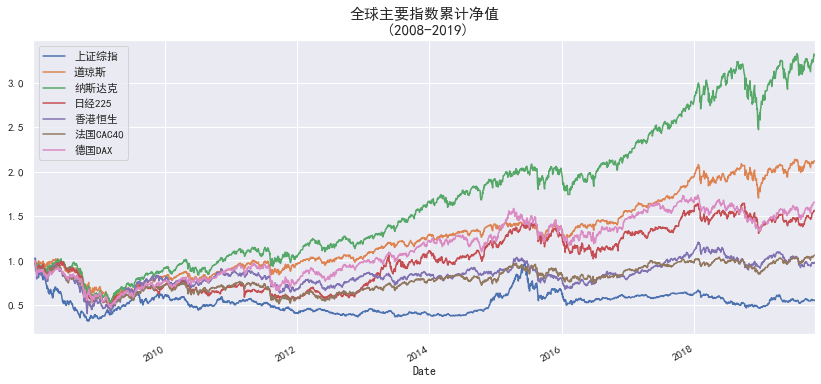

In [19]:
#累计收益率
(data/data.iloc[0]).plot(figsize=(14,6))
plt.title('全球主要指数累计净值\n (2008-2019)',size=15)
plt.show()

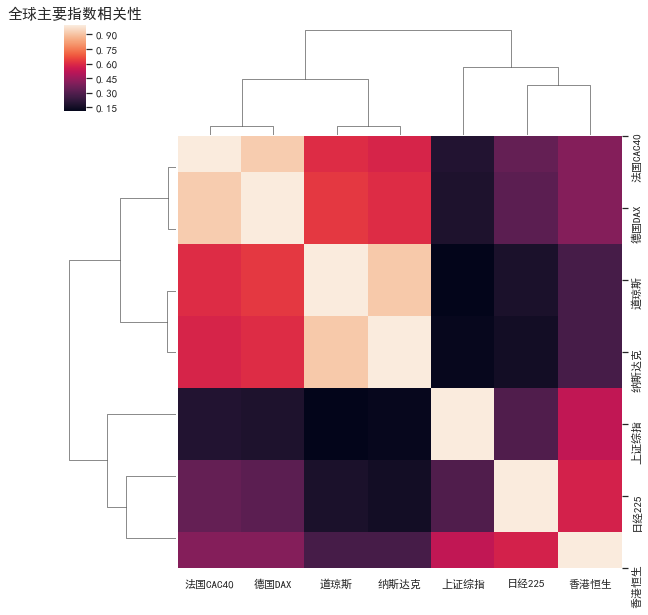

In [20]:
#收益率相关性
ret=data.apply(lambda x : (x/x.shift(1)-1)*100).dropna()
sns.clustermap(ret.corr())
plt.title('全球主要指数相关性',size=15)
plt.show()

In [21]:
def get_variables(ret):
    '''ret为上述指数收益率数据'''
    df=pd.DataFrame()
    df['lag1']=ret['上证综指'].shift(1)
    df['lag2']=ret['上证综指'].shift(2)
    df['DJ']=ret['道琼斯'].shift(1)
    df['DA']=ret['德国DAX'].shift(1)
    df['RJ']=ret['日经225'].shift(1)
    #上涨用1表示，下跌（含0）为-1
    df['direction']=np.where(ret['上证综指'].values>0,1.0,-1.0)
    df=df.dropna()
    return df

In [90]:
#引入机器学习库
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve
def fit_model(name, model, X_train, y_train, X_test, pred):
    """使用LR, LDA 、QDA对数据进行模型拟合
    """
    # Fit and predict the model on the training, and then test, data
    model.fit(X_train, y_train)
    pred[name] = model.predict(X_test)
    # 预测准确率
    score=accuracy_score(pred['Actual'], pred[name])
    print("%s模型: %.3f" % (name, score)) 

In [91]:
if __name__ == "__main__":
    #获取数据
    variables = get_variables(ret).loc[:'2017']
    # 涨跌方向为响应变量, 其余变量为自变量
    X = variables.iloc[:,:-1]
    y = variables.iloc[:,-1]
    # 把原始数据的40%作为测试数据，其余为训练数据
    #X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)
    #以2017年以前数据为训练集，2017年数据为测试集
    
    start_test = datetime.datetime(2017,1,1)
    X_train = X[X.index < start_test]
    X_test = X[X.index >= start_test]
    y_train = y[y.index < start_test]
    y_test = y[y.index >= start_test]
    # 创建预测数据框
    pred = pd.DataFrame(index=y_test.index)
    pred["Actual"] = y_test
    # 分别拟合LR, LDA 和QDA三个模型  
    print ("预测准确率:")
    models = [("LR", LogisticRegression(solver='liblinear')), ("LDA", LDA()), ("QDA", QDA())]
    for m in models:
        fit_model(m[0], m[1], X_train, y_train, X_test, pred)

预测准确率:
LR模型: 0.557
LDA模型: 0.566
QDA模型: 0.590


In [92]:
model=QDA()
model.fit(X_train, y_train)
# 模型在测试数据集上的预测
pred = model.predict(X_test)
# 构建混淆矩阵
cm = pd.crosstab(y_test,pred)
cm
# 绘制混淆矩阵图
#sns.heatmap(cm, annot = True, cmap = 'GnBu', fmt = 'd')

col_0,-1.0,1.0
direction,,
-1.0,3,98
1.0,2,141


In [93]:
print('模型的准确率为：\n',accuracy_score(y_test, pred))
print('模型的评估报告：\n',classification_report(y_test, pred))

模型的准确率为：
 0.5901639344262295
模型的评估报告：
               precision    recall  f1-score   support

        -1.0       0.60      0.03      0.06       101
         1.0       0.59      0.99      0.74       143

    accuracy                           0.59       244
   macro avg       0.59      0.51      0.40       244
weighted avg       0.59      0.59      0.46       244



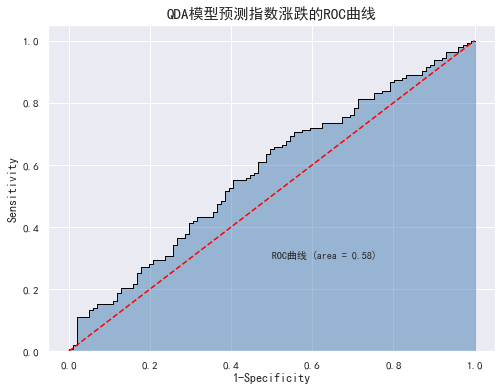

In [94]:
# 计算正例的预测概率，而非实际的预测值，用于生成ROC曲线的数据
y_score = model.predict_proba(X_test)[:,1]
#fpr表示1-Specificity,tpr表示Sensitivity
fpr,tpr,threshold = roc_curve(y_test, y_score)
# 计算AUC的值
roc_auc = metrics.auc(fpr,tpr)
# 绘制面积图
plt.figure(figsize=(8,6))
plt.stackplot(fpr, tpr, color='steelblue', alpha = 0.5, edgecolor = 'black')
plt.plot(fpr, tpr, color='black', lw = 1)
# 添加对角线
plt.plot([0,1],[0,1], color = 'red', linestyle = '--')
# 添加文本信息
plt.text(0.5,0.3,'ROC曲线 (area = %0.2f)' % roc_auc)
# 添加x轴与y轴标签
plt.title('QDA模型预测指数涨跌的ROC曲线',size=15)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

quantstart:

[Forecasting Financial Time Series - Part I](https://www.quantstart.com/articles/Forecasting-Financial-Time-Series-Part-1)